#  Image   calssification using tensorflow 2.0 and keras 

**Importing important  libraries**





In [0]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

**Steps of convolutional neural networks:**

**Convolution Operation ----> Pooling ------> Flattening -----> Full Connection**
              

![alt text](https://drive.google.com/uc?id=1GRtfF7sronhA1t3R82_OL7ermSpAe7p9)


![alt text](https://i0.wp.com/vinodsblog.com/wp-content/uploads/2018/10/CNN-2.png?resize=1300%2C479&ssl=1)

**Step 1 - Convolution**



In [0]:
classifier = Sequential()
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

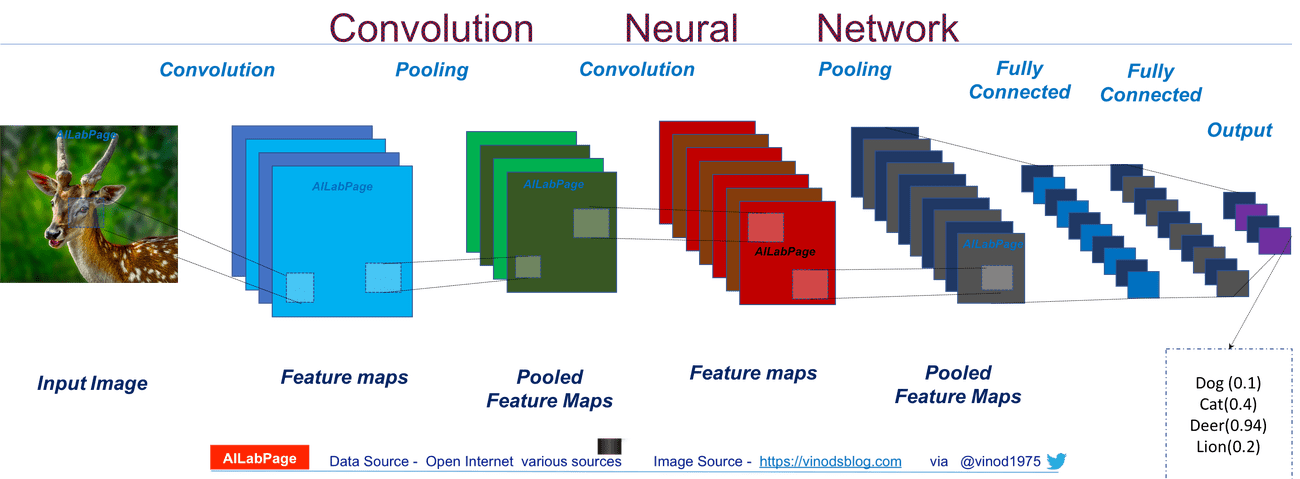

In [8]:
from IPython.display import Image
Image('CNN.png')

**Step 2 - Pooling**

In [0]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))

**Step 3 -Adding a second convolutional layer**

In [0]:
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

**Step 4 - Flattening**

In [0]:
classifier.add(Flatten())

**Step 5 - Full connection**

In [0]:
classifier.add(Dense(128, activation = 'relu'))
classifier.add(Dense(1, activation = 'sigmoid'))

Step 6 -Compiling the CNN


```



In [0]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


Step 7 - Fitting the CNN to the images

In [0]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [0]:
list(test_set

In [0]:
classifier.fit_generator(training_set,
                         steps_per_epoch = 500,
                         epochs = 10,
                         validation_data = test_set,
                         validation_steps = 2000)

Epoch 1/10
500/500 [==============================] - 208s 415ms/step - loss: 0.5957 - acc: 0.6818 - val_loss: 0.5345 - val_acc: 0.7406
Epoch 2/10
500/500 [==============================] - 206s 412ms/step - loss: 0.5158 - acc: 0.7423 - val_loss: 0.5165 - val_acc: 0.7587
Epoch 3/10
500/500 [==============================] - 206s 411ms/step - loss: 0.4784 - acc: 0.7660 - val_loss: 0.4831 - val_acc: 0.7762
Epoch 4/10
500/500 [==============================] - 204s 409ms/step - loss: 0.4464 - acc: 0.7882 - val_loss: 0.4809 - val_acc: 0.7872
Epoch 5/10
500/500 [==============================] - 207s 414ms/step - loss: 0.4153 - acc: 0.8070 - val_loss: 0.4944 - val_acc: 0.7607
Epoch 6/10
500/500 [==============================] - 204s 408ms/step - loss: 0.3846 - acc: 0.8239 - val_loss: 0.4933 - val_acc: 0.7803
Epoch 7/10
500/500 [==============================] - 207s 414ms/step - loss: 0.3595 - acc: 0.8376 - val_loss: 0.4702 - val_acc: 0.7944
Epoch 8/10
500/500 [============================

In [0]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [0]:
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
    
print(prediction)

dog
